# Atsuko To-Dos For This Week:
### Make 4 different dataframes:
1. Drop rows where "year built" is null
2. Drop these columns:
    - direction_max_wind_speed
    - direction_peak_wind_speed
    - max_wind_speed
    - days with fog
3. Dummy encode State_Factor
4. Impute energy_star_rating:
    - **A: Using mean for facility type** 
    - B: Using median for facility type
    - C: Using mean for business class
    - D: Using median for business class
5. Run Random Forest Regressor for each dataframe for the training dataset (further split into subset of train/test)

# This notebook = A

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
df.shape

(75757, 64)

<AxesSubplot:>

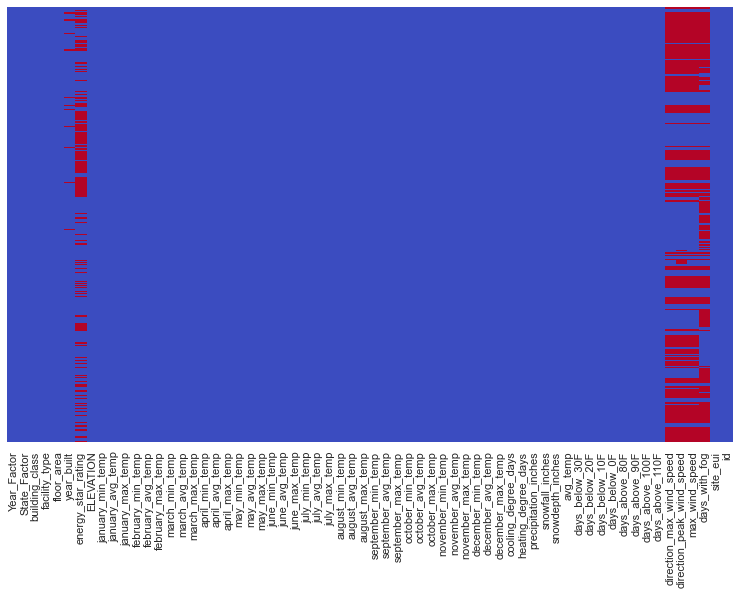

In [5]:
fig, ax = plt.subplots(figsize=(13,8))       
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

### 1. Drop rows where "year built" is null, and where "year buil" is 0

In [6]:
df = df[df['year_built'].notna()]

In [7]:
df.shape

(73920, 64)

In [8]:
df = df[(df['year_built'] != 0)]

In [9]:
df.shape

(73914, 64)

In [10]:
df['year_built'].unique()

array([1942., 1955., 1951., 1980., 1985., 1956., 1982., 1947., 1929.,
       1979., 1927., 1960., 1924., 1949., 1926., 1914., 1973., 1900.,
       1913., 1962., 1989., 1967., 1954., 1986., 1906., 1912., 1902.,
       1920., 1905., 1997., 1909., 2002., 1974., 1907., 1908., 1988.,
       1987., 1923., 1948., 1966., 1975., 1934., 1938., 1983., 2003.,
       1915., 1961., 1911., 1925., 1964., 1953., 1957., 2006., 1990.,
       1991., 1969., 1968., 1910., 1937., 1971., 1965., 1946., 1917.,
       1901., 2000., 2008., 1999., 1981., 2001., 1978., 1898., 1928.,
       1970., 1918., 1930., 1903., 1936., 1921., 1922., 1984., 1976.,
       1952., 1959., 1916., 1963., 1972., 1919., 1931., 1958., 1994.,
       1940., 2010., 2009., 1889., 1939., 1945., 1904., 1932., 1941.,
       1977., 1993., 1992., 1950., 1944., 1935., 1996., 1995., 1933.,
       1943., 2007., 2005., 2004., 1869., 2011., 2012., 1864., 1998.,
       1895., 1896., 1875., 1880., 1888., 1897., 1891., 2013., 1887.,
       1882., 1886.,

### 2. Drop these columns:
    - direction_max_wind_speed
    - direction_peak_wind_speed
    - max_wind_speed
    - days with fog

In [11]:
df = df.drop(columns = ['direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'])

In [12]:
df.shape

(73914, 60)

### 3. Impute ESR with mean for each facility type

In [13]:
# create a series 
gb = df.groupby('facility_type')['energy_star_rating'].mean()

# convert the series to a dictionary
new_dict = gb.to_dict()

In [14]:
# sanity check - before 

df['energy_star_rating'].isnull().sum()

25475

In [15]:
# fill all null values in the energy_star_rating column with corresponding values mapped from the dictionary 

df['energy_star_rating'] = df['energy_star_rating'].fillna(df['facility_type'].map(new_dict))

In [16]:
# saniry check - midpoint

df['energy_star_rating'].isnull().sum()

1083

In [17]:
# now fill the remaining null values for energy star rating with the overall mean

esr_mean = df['energy_star_rating'].mean()
df['energy_star_rating'].fillna(value = esr_mean, inplace=True)

In [18]:
# final sanity check 

df['energy_star_rating'].isnull().sum()

0

### 4. Dummy encode State_Factor, business_class,  facility_type

In [19]:
df = pd.get_dummies(df, columns=['State_Factor', 'building_class', 'facility_type'], drop_first=True)
df.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_6,State_Factor_State_8,building_class_Residential,facility_type_5plus_Unit_Building,facility_type_Commercial_Other,facility_type_Commercial_Unknown,facility_type_Data_Center,facility_type_Education_College_or_university,facility_type_Education_Other_classroom,facility_type_Education_Preschool_or_daycare,facility_type_Education_Uncategorized,facility_type_Food_Sales,facility_type_Food_Service_Other,facility_type_Food_Service_Restaurant_or_cafeteria,facility_type_Food_Service_Uncategorized,facility_type_Grocery_store_or_food_market,facility_type_Health_Care_Inpatient,facility_type_Health_Care_Outpatient_Clinic,facility_type_Health_Care_Outpatient_Uncategorized,facility_type_Health_Care_Uncategorized,facility_type_Industrial,facility_type_Laboratory,facility_type_Lodging_Dormitory_or_fraternity_sorority,facility_type_Lodging_Hotel,facility_type_Lodging_Other,facility_type_Lodging_Uncategorized,facility_type_Mixed_Use_Commercial_and_Residential,facility_type_Mixed_Use_Predominantly_Commercial,facility_type_Mixed_Use_Predominantly_Residential,facility_type_Multifamily_Uncategorized,facility_type_Nursing_Home,facility_type_Office_Bank_or_other_financial,facility_type_Office_Medical_non_diagnostic,facility_type_Office_Mixed_use,facility_type_Office_Uncategorized,facility_type_Parking_Garage,facility_type_Public_Assembly_Drama_theater,facility_type_Public_Assembly_Entertainment_culture,facility_type_Public_Assembly_Library,facility_type_Public_Assembly_Movie_Theater,facility_type_Public_Assembly_Other,facility_type_Public_Assembly_Recreation,facility_type_Public_Assembly_Social_meeting,facility_type_Public_Assembly_Stadium,facility_type_Public_Assembly_Uncategorized,facility_type_Public_Safety_Courthouse,facility_type_Public_Safety_Fire_or_police_station,facility_type_Public_Safety_Penitentiary,facility_type_Public_Safety_Uncategorized,facility_type_Religious_worship,facility_type_Retail_Enclosed_mall,facility_type_Retail_Strip_shopping_mall,facility_type_Retail_Uncategorized,facility_type_Retail_Vehicle_dealership_showroom,facility_type_Service_Drycleaning_or_Laundry,facility_type_Service_Uncategorized,facility_type_Service_Vehicle_service_repair_shop,facility_type_Warehouse_Distribution_or_Shipping_center,facility_type_Warehouse_Nonrefrigerated,facility_type_Warehouse_Refrigerated,facility_type_Warehouse_Selfstorage,facility_type_Warehouse_Uncategorized
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,248.682615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,

In [20]:
df.shape

(73914, 123)

<AxesSubplot:>

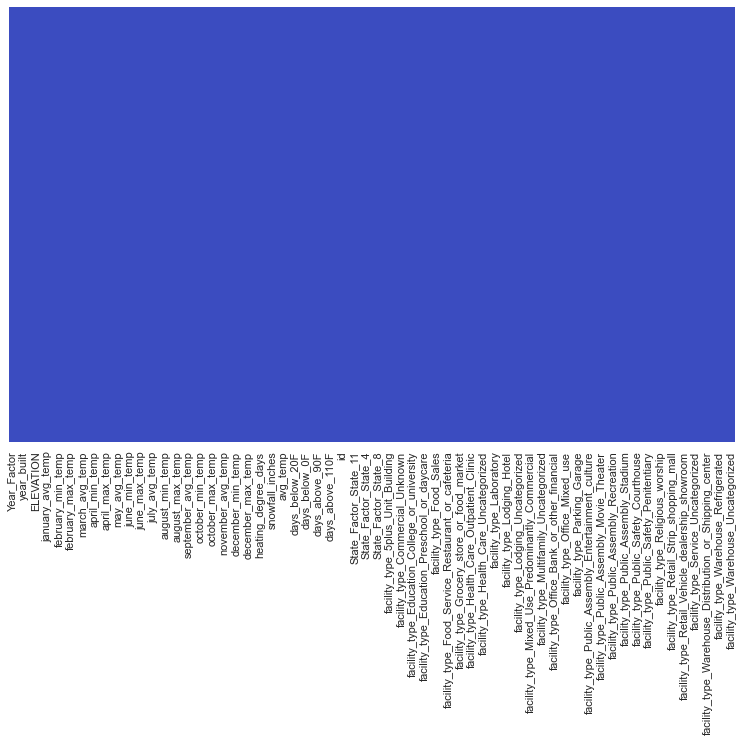

In [21]:
fig, ax = plt.subplots(figsize=(13,8))       
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

In [22]:
df.columns

Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp',
       ...
       'facility_type_Retail_Uncategorized',
       'facility_type_Retail_Vehicle_dealership_showroom',
       'facility_type_Service_Drycleaning_or_Laundry',
       'facility_type_Service_Uncategorized',
       'facility_type_Service_Vehicle_service_repair_shop',
       'facility_type_Warehouse_Distribution_or_Shipping_center',
       'facility_type_Warehouse_Nonrefrigerated',
       'facility_type_Warehouse_Refrigerated',
       'facility_type_Warehouse_Selfstorage',
       'facility_type_Warehouse_Uncategorized'],
      dtype='object', length=123)

### 5. Train/Test Split Using Training Set 

In [23]:
from sklearn.model_selection import train_test_split

In [39]:
all_cols = list(df.columns)
remove = ['site_eui', 'id']
features = [i for i in all_cols if i not in remove]

In [40]:
target = ['site_eui']

In [72]:
X = df[features].values
y = df[target].values

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### 6. Train the Random Forest Regression model on the training set

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
model = RandomForestRegressor(random_state = 1)

In [84]:
model.fit(X_train, y_train)

/var/folders/q_/gvpm75_x119_87lkzv9498bc0000gn/T/ipykernel_34342/180087699.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(random_state=1)

In [85]:
y_pred = model.predict(X_test)

In [86]:
# CREATE A PANDAS DATAFRAME USING OUR PREDICTIONS 
df_preds = pd.DataFrame(y_pred, columns=['predictions'])

# CREATE A COLUMN OF THE ACTUAL VALUES FROM OUR TEST SET
df_preds['actual'] = y_test

# CALCULATE THE ABSOLUTE ERROR OF THE PREDICTIONS TO OUR ACTUAL 
df_preds['abs_error'] = abs(df_preds['predictions'] - df_preds['actual'])

# DISPLAY OUR DATAFRAME
df_preds.head(10)

,predictions,actual,abs_error
0,26.011499,24.012661,1.998837
1,75.460534,62.468995,12.991539
2,64.463935,69.016641,4.552706
3,87.954162,92.170018,4.215856
4,82.543185,76.953933,5.589252
5,103.682202,138.440091,34.757890
6,104.994122,79.781421,25.212701
7,76.219266,1.597261,74.622005
8,565.644745,621.378607,55.733862
9,111.662264,66.478833,45.183430


### 7. Metrics

In [79]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

In [87]:
r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

R-Squared Score: 0.5505604814350635


In [88]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 19.490378660807472


In [89]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

RMSE: 38.53045532198106


### 8. Linear Regression

In [64]:
# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()

In [66]:
model.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = model.predict(X_test)

In [69]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

RMSE: 45.64053145208002


### 8. Explore the site_eui a little more to see if it makes sense to eliminate outliers

<AxesSubplot:xlabel='site_eui'>

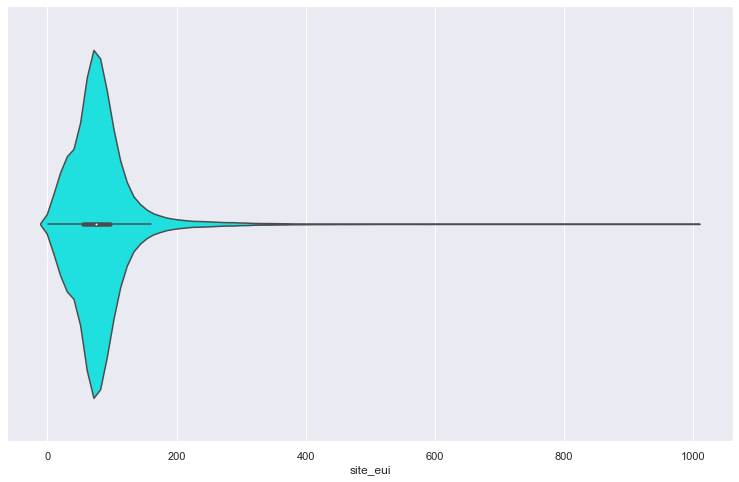

In [91]:
plt.figure(figsize=(13, 8))
sns.violinplot(x='site_eui', data=df, color='aqua')

<AxesSubplot:xlabel='site_eui'>

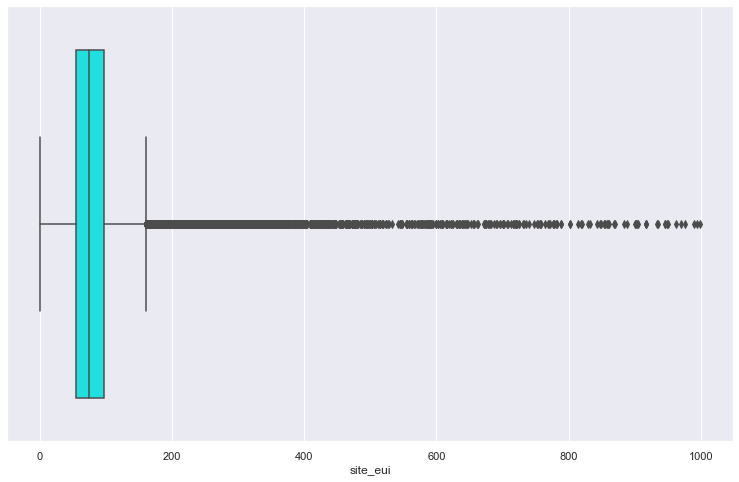

In [92]:
plt.figure(figsize=(13, 8))
sns.boxplot(x='site_eui', data=df, color='aqua')

/Users/atsukosakurai/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='site_eui', ylabel='Density'>

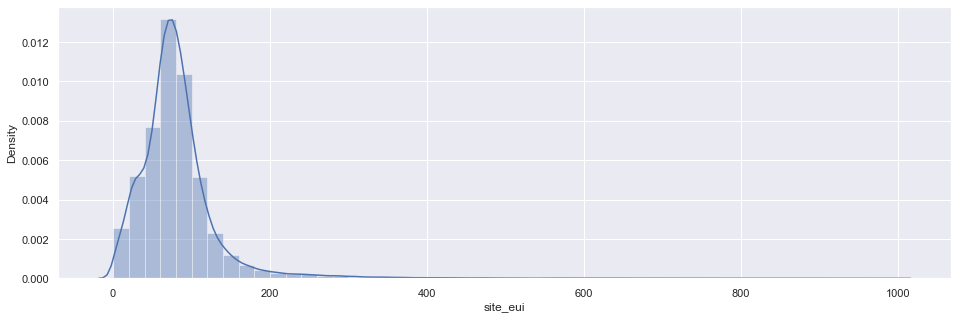

In [132]:
plt.figure(figsize=(16,5))
sns.distplot(df['site_eui'])

### XGBoost Regressor

In [97]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE

In [98]:
from sklearn.model_selection import cross_val_score

In [124]:
params={ 'objective':'reg:squarederror',
         'max_depth': 6, 
         'colsample_bylevel':0.5,
         'learning_rate':0.01,
         'random_state':20}

In [125]:
xgb_r = xgb.XGBRegressor(params=params)

In [126]:
xgb_r.fit(X_train, y_train)

[21:04:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1,
             params={'colsample_bylevel': 0.5, 'learning_rate': 0.01,
                     'max_depth': 6, 'objective': 'reg:squarederror',
                     'random_state': 20},
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [127]:
pred = xgb_r.predict(X_test)

In [129]:
rmse = np.sqrt(MSE(y_test, pred))
print('RMSE: % f' %(rmse))

RMSE:  38.729566


In [ ]:
test.to_csv('.csv', index=None)